<a href="https://colab.research.google.com/github/cammylexi/CS2341-Assignment-3/blob/main/Lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('cybercrime_forensic_dataset.csv')
df.head()

Pandas: 2.2.2
Numpy: 1.26.4


,Timestamp,User_ID,IP_Address,Activity_Type,Resource_Accessed,File_Name,Action,Login_Attempts,File_Size,Anomaly_Type,Label
0,2024-09-27 12:53:26.390859,9288,10.174.236.5,File_Modification,/network/logs/new_project.docx,new_project.docx,Delete,NaN,30.66,DDoS_Attempt,Suspicious
1,2024-10-02 15:13:49.741543,1605,172.19.128.216,USB_Insert,/server/secrets.txt,NaN,Read,NaN,NaN,Brute_Force,Suspicious
2,2024-09-13 14:31:39.163288,3056,192.168.201.132,File_Modification,/project/document2.docx,document2.docx,NaN,NaN,21.61,DDoS_Attempt,Suspicious
3,2024-10-02 22:27:57.622008,1564,10.119.122.121,Network_Traffic,/backup/document2.docx,NaN,Delete,NaN,NaN,NaN,Normal
4,2024-10-01 08:00:55.017797,3660,172.23.2.38,USB_Insert,/confidential/report1.pdf,NaN,Write,NaN,NaN,NaN,Normal


In [ ]:
df.describe()

,User_ID,Login_Attempts,File_Size
count,7400.000000,2105.000000,3196.000000
mean,5535.768378,5.428504,24.669703
std,2575.574425,2.862625,14.133492
min,1000.000000,1.000000,0.130000
25%,3358.750000,3.000000,12.635000
50%,5516.000000,5.000000,24.590000
75%,7755.000000,8.000000,36.782500
max,9997.000000,10.000000,49.980000


In [ ]:
print(df.dtypes)
print('===========')
print(df.info())

Timestamp             object
User_ID                int64
IP_Address            object
Activity_Type         object
Resource_Accessed     object
File_Name             object
Action                object
Login_Attempts       float64
File_Size            float64
Anomaly_Type          object
Label                 object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          7400 non-null   object 
 1   User_ID            7400 non-null   int64  
 2   IP_Address         7400 non-null   object 
 3   Activity_Type      7400 non-null   object 
 4   Resource_Accessed  7400 non-null   object 
 5   File_Name          3196 non-null   object 
 6   Action             6348 non-null   object 
 7   Login_Attempts     2105 non-null   float64
 8   File_Size          3196 non-null   float64
 9   Anomaly_Type       1233 non

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [ ]:
#Grouping data by Activity_Type
df_grouped = df.groupby(by='Activity_Type')
df_grouped

In [ ]:
for val,grp in df_grouped:
    print(f'There were {len(grp)} cybercrime incidents in {val} Activity_Type.')

There were 1092 cybercrime incidents in File_Access Activity_Type.
There were 1037 cybercrime incidents in File_Deletion Activity_Type.
There were 1067 cybercrime incidents in File_Modification Activity_Type.
There were 1053 cybercrime incidents in Login Activity_Type.
There were 1068 cybercrime incidents in Network_Traffic Activity_Type.
There were 1052 cybercrime incidents in Remote_Login Activity_Type.
There were 1031 cybercrime incidents in USB_Insert Activity_Type.


<Figure size 640x480 with 0 Axes>

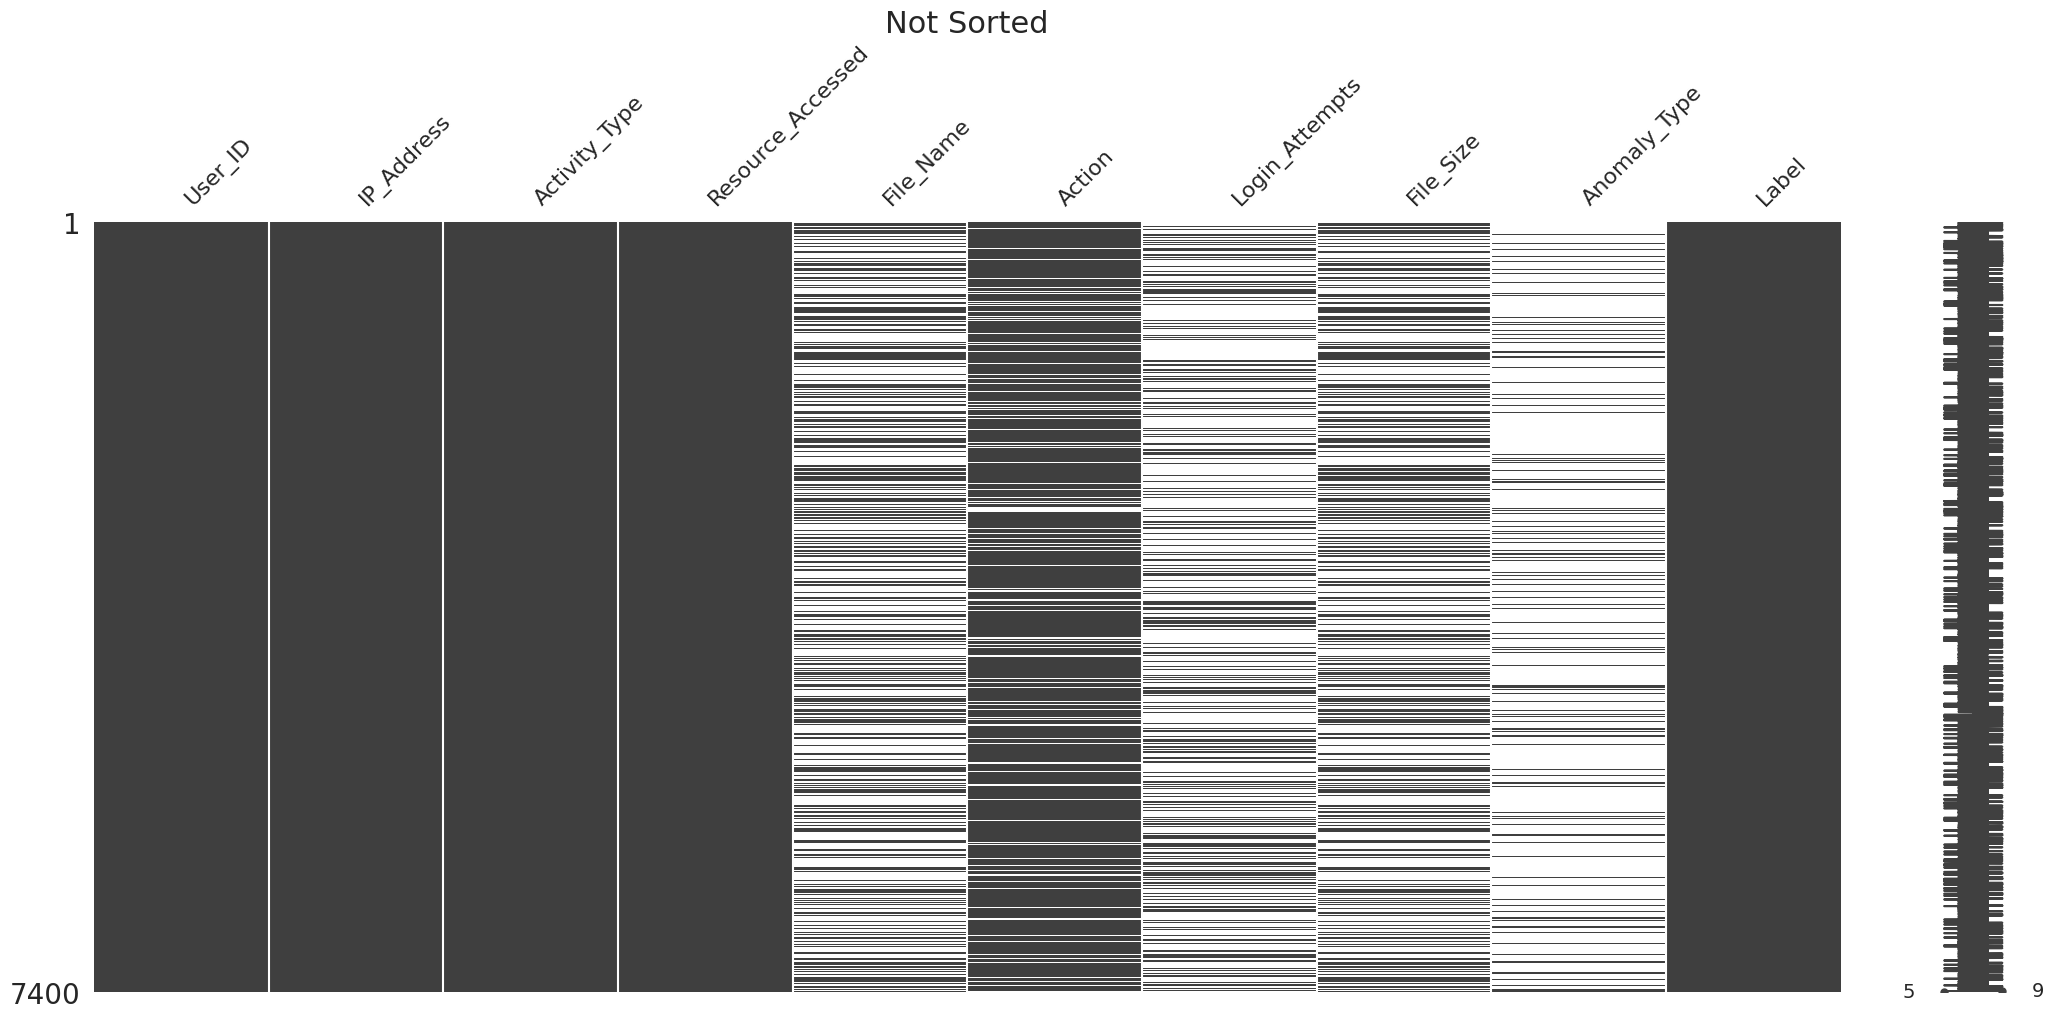

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# External package: conda install missingno
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()


In [ ]:
"""
for col in ['File_Name','Resource_Accessed','IP_Address','User_ID','Timestamp']:
    if col in df:
        del df[col]

df.info()
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Activity_Type   7400 non-null   object 
 1   Action          6348 non-null   object 
 2   Login_Attempts  2105 non-null   float64
 3   File_Size       3196 non-null   float64
 4   Anomaly_Type    1233 non-null   object 
 5   Label           7400 non-null   object 
dtypes: float64(2), object(4)
memory usage: 347.0+ KB


"Suspicious" percentage by Acticity Type and Anomaly Type

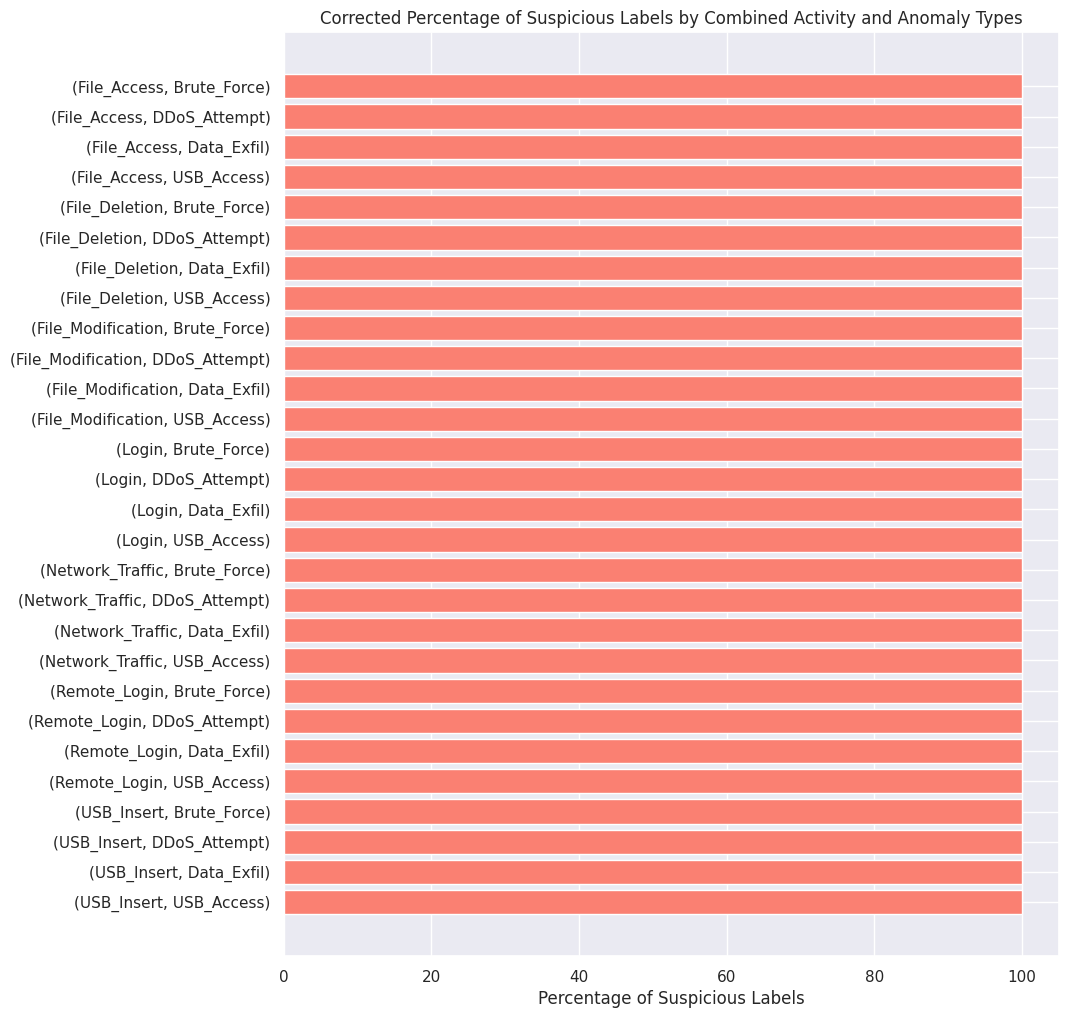

In [ ]:
grouped = df.groupby(['Activity_Type', 'Anomaly_Type', 'Label']).size().unstack(fill_value=0).reset_index()

grouped['Suspicious'] = grouped.get('Suspicious', 0)  # Use get with default 0
grouped['Normal'] = grouped.get('Normal', 0)          # Use get with default 0
# Calculate the total number of activities per group
grouped['Total'] = grouped['Suspicious'] + grouped['Normal']

# Calculate the percentage of suspicious activities
grouped['Suspicious_Percentage'] = grouped['Suspicious'] / grouped['Total'] * 100

# Create a combined label for Activity_Type and Anomaly_Type for clearer visualization
grouped['Combined_Label'] = grouped.apply(lambda x: f"({x['Activity_Type']}, {x['Anomaly_Type']})", axis=1)

# Sorting the data for better visualization (optional: adjust sorting based on your preference)
grouped_sorted = grouped.sort_values(by=['Activity_Type', 'Anomaly_Type'], ascending=[True, True])

# Plotting the data using a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(grouped_sorted['Combined_Label'], grouped_sorted['Suspicious_Percentage'], color='salmon')
plt.xlabel('Percentage of Suspicious Labels')
plt.title('Corrected Percentage of Suspicious Labels by Combined Activity and Anomaly Types')
plt.gca().invert_yaxis()  # Invert y-axis to match the example's order
plt.show()

If one row has both activity_type and anomaly_type or with anomaly_type, it should be labeled as "suspicious". As a result, it is meaningless to analysis by both group activity_type and anomaly_type.

"Suspicious" percentage by Acticity Type

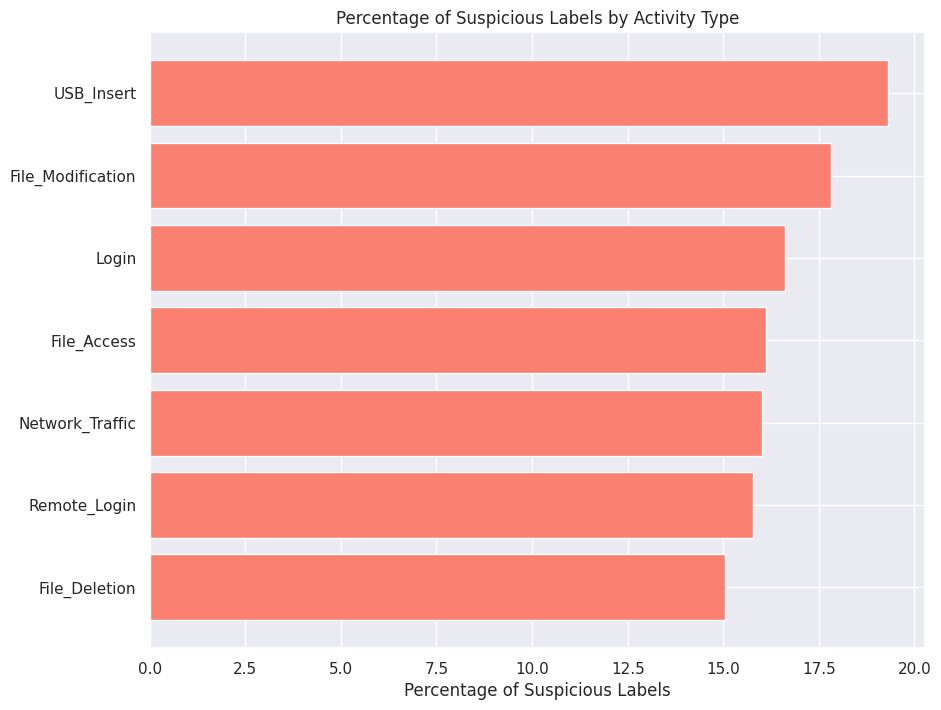

In [ ]:
grouped2 = df.groupby(['Activity_Type', 'Label']).size().unstack(fill_value=0)

# Ensure both 'Suspicious' and 'Normal' columns exist even if they are absent
grouped2['Suspicious'] = grouped2.get('Suspicious', 0)
grouped2['Normal'] = grouped2.get('Normal', 0)

# Calculate the total number of activities per activity type
grouped2['Total'] = grouped2['Suspicious'] + grouped2['Normal']

# Calculate the percentage of 'Suspicious' labels
grouped2['Suspicious_Percentage'] = (grouped2['Suspicious'] / grouped2['Total']) * 100 if grouped2['Total'].sum() != 0 else 0

# Sorting the data for better visualization
grouped_sorted = grouped2.sort_values(by='Suspicious_Percentage', ascending=False)

# Plotting the data using a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(grouped_sorted.index, grouped_sorted['Suspicious_Percentage'], color='salmon')
plt.xlabel('Percentage of Suspicious Labels')
plt.title('Percentage of Suspicious Labels by Activity Type')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest percentages at the top
plt.show()

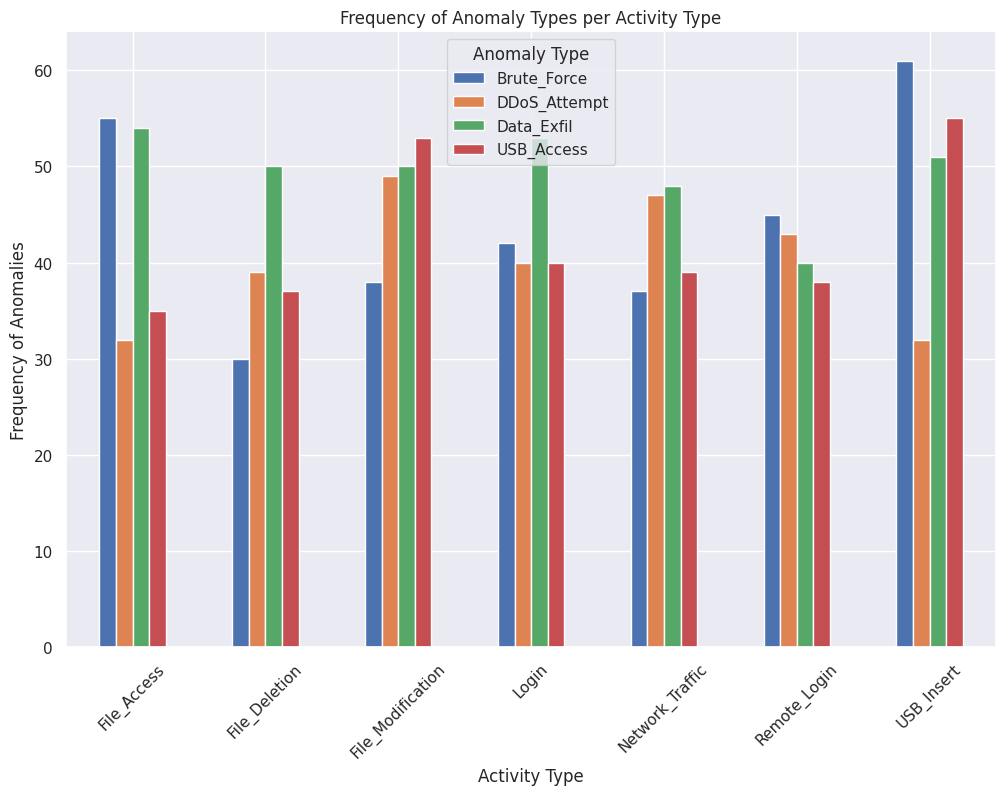

In [ ]:
grouped_data = df.groupby(['Activity_Type', 'Anomaly_Type']).size().reset_index(name='Counts')

# Pivot the data to make Anomaly Types columns and Activity Types as rows
pivot_data = grouped_data.pivot(index='Activity_Type', columns='Anomaly_Type', values='Counts').fillna(0)

# Plotting the data using a grouped bar chart
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Frequency of Anomaly Types per Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Frequency of Anomalies')
plt.legend(title='Anomaly Type')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.show()

The most frequent anomaly_type in each activity_type
File_Access:Brute_Force

* File_Deletion:Data_Exfil
* File_Modification:USB_Access
* Login:Data_Exfil
* Network_Traffic:Data_Exfil
* Remote_Login:Brute_Force
* USB_Insert:Brute_Force











<Axes: xlabel='Activity_Type', ylabel='File_Size'>

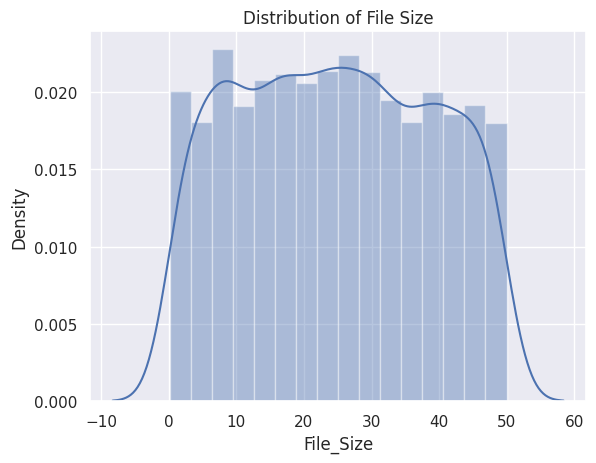

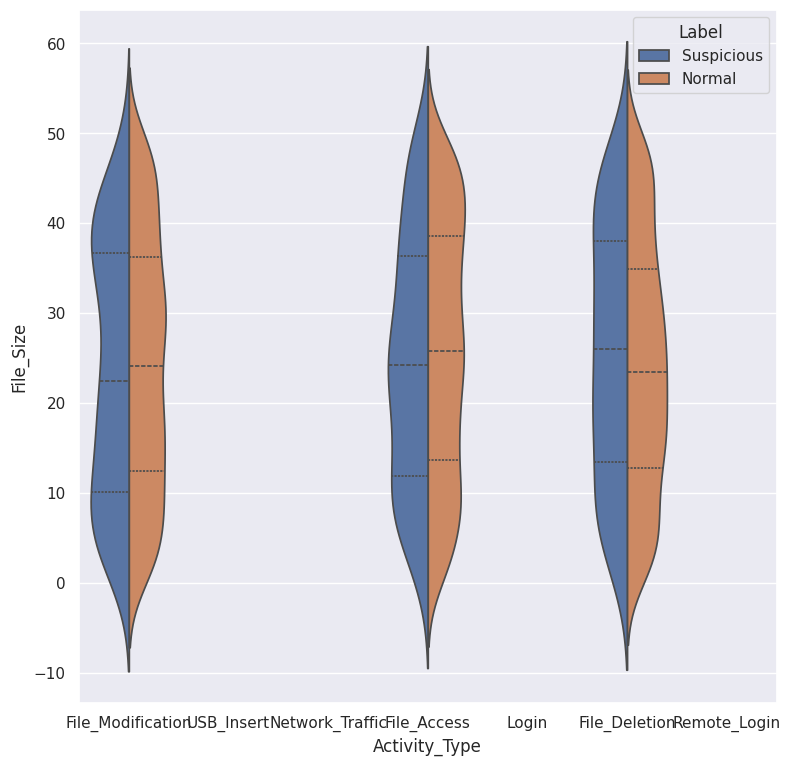

In [ ]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.File_Size)
plt.title('Distribution of File Size')
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="Activity_Type", y="File_Size", hue="Label",data=df,
               split=True, inner="quart")

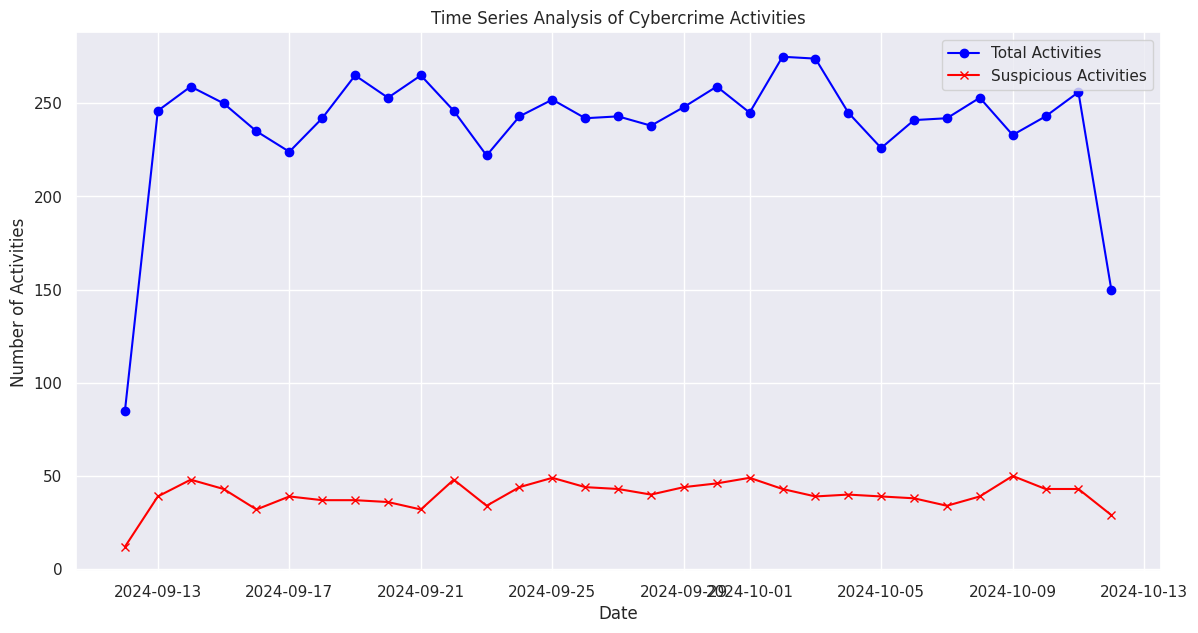

In [ ]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' as the index of the DataFrame
df.set_index('Timestamp', inplace=True)

# Resample the data to get daily counts of all activities
daily_activities = df.resample('D').size()

# Resample to get daily counts of suspicious activities
daily_suspicious_activities = df[df['Label'] == 'Suspicious'].resample('D').size()

# Plotting the time series of total activities
plt.figure(figsize=(14, 7))
plt.plot(daily_activities, label='Total Activities', color='blue', marker='o', linestyle='-')

# Plotting the time series of suspicious activities
plt.plot(daily_suspicious_activities, label='Suspicious Activities', color='red', marker='x', linestyle='-')

plt.title('Time Series Analysis of Cybercrime Activities')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.legend()
plt.grid(True)
plt.show()
